<a href="https://colab.research.google.com/github/sandeeptuluri/Projects/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
z = 100000
sum = 0
for i in range(120):
  x = sum*1.05
  sum = z+x
  print(sum)

100000.0
205000.0
315250.0
431012.5
552563.125
680191.28125
814200.8453125
954910.8875781251
1102656.4319570314
1257789.253554883
1420678.7162326272
1591712.6520442585
1771298.2846464715
1959863.1988787951
2157856.358822735
2365749.1767638717
2584036.6356020654
2813238.467382169
3053900.3907512776
3306595.4102888415
3571925.1808032836
3850521.439843448
4143047.5118356203
4450199.887427402
4772709.881798772
5111345.375888711
5466912.644683147
5840258.276917305
6232271.19076317
6643884.7503013285
7076078.987816395
7529882.937207215
8006377.084067577
8506695.938270956
9032030.735184504
9583632.27194373
10162813.885540916
10770954.579817962
11409502.308808861
12079977.424249304
12783976.29546177
13523175.110234858
14299333.865746602
15114300.559033934
15970015.58698563
16868516.366334915
17811942.18465166
18802539.293884244
19842666.258578457
20934799.57150738
22081539.55008275
23285616.52758689
24549897.353966232
25877392.221664544
27271261.832747772
28734824.924385164
30271566.170604423


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#scaling the data before input in the model

In [ ]:
train_images = train_images/255

In [ ]:
test_images = test_images/255

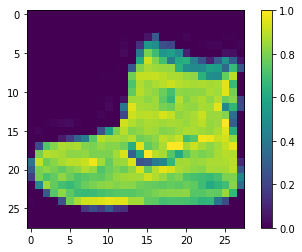

In [ ]:
plt.figure()
a = train_images[0]
plt.imshow(a)
plt.colorbar()
plt.grid(False)
plt.show()

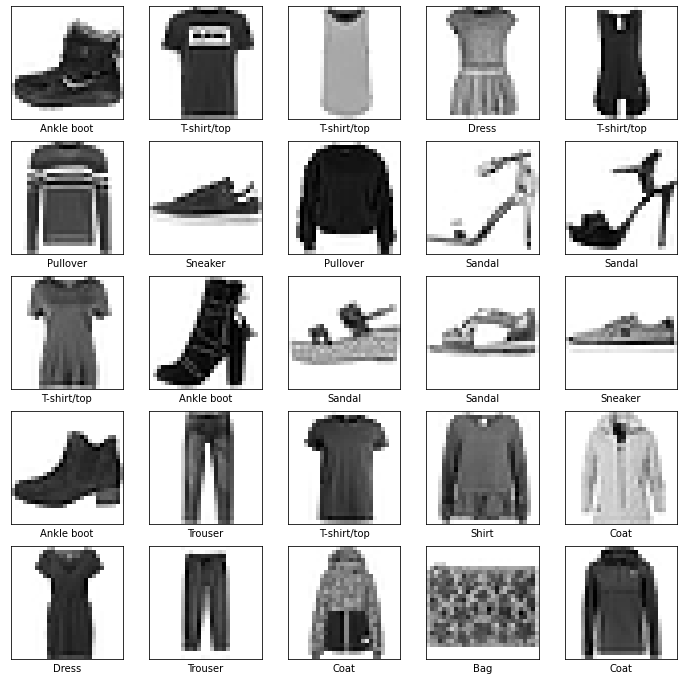

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5000 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3742 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2941 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2808 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2603 - accuracy: 0.9023
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2499 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy", test_acc)

313/313 - 0s - loss: 0.3263 - accuracy: 0.8836

Test accuracy 0.8835999965667725


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([7.3648594e-09, 1.3045407e-08, 2.8532142e-11, 9.2515615e-14,
       7.0586594e-08, 9.9179300e-04, 1.0341821e-07, 1.9421572e-02,
       1.0234479e-08, 9.7958642e-01], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

In [ ]:
# graphing this to look at the full set of 10 class predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# verifying predictions

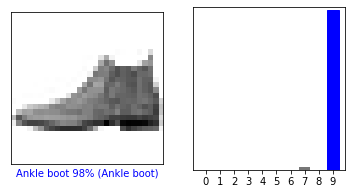

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

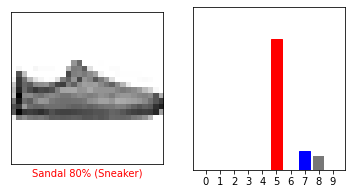

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

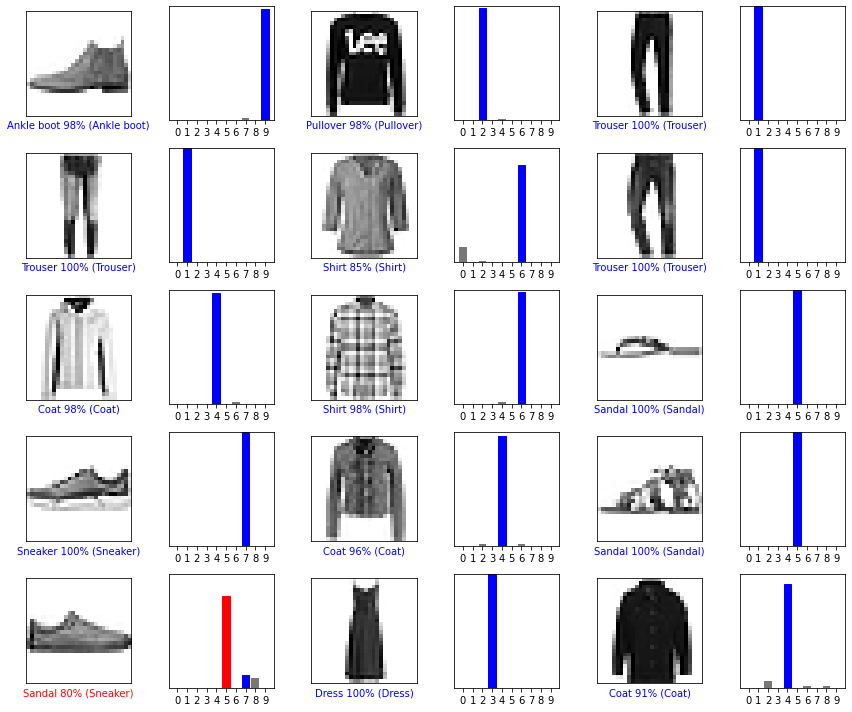

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3705363e-04 7.9562699e-14 9.8204011e-01 3.0999793e-12 1.6742026e-02
  1.2626635e-15 1.0808350e-03 1.2286704e-16 1.4240839e-09 4.9065876e-11]]


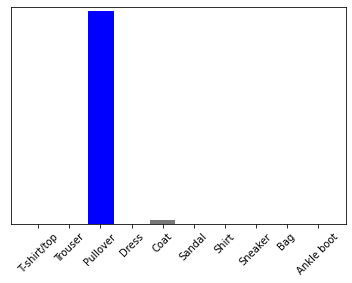

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2